<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/hw1_problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/D3.csv'
df = pd.read_csv(file_path)

from IPython.display import display
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [4]:
# Separate features and labels
x1 = df.values[:, 0]  # get input value x1
x2 = df.values[:, 1]  # get input value x2
x3 = df.values[:, 2]  # get input value x3

y = df.values[:, 3]  # get output y
m = len(y)  # Number of training examples

print('m = ', m)

m =  100


Text(0.5, 1.0, 'Scatter plot of training data')

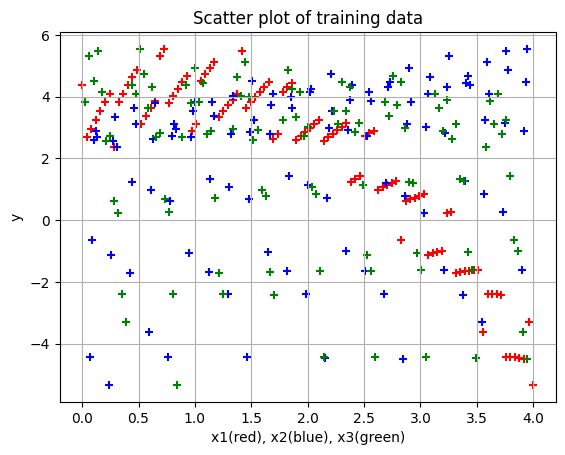

In [5]:
# Scatter plot
plt.scatter(x1, y, color='red', marker='+')
plt.scatter(x2, y, color='blue', marker='+')
plt.scatter(x3, y, color='green', marker='+')


# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('x1(red), x2(blue), x3(green)')
plt.ylabel('y')
plt.title('Scatter plot of training data')

# Show the plot
#plt.show()

In [16]:
X_0 = np.ones((m, 1))

X_1 = x1.reshape(m, 1)
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)

X = np.hstack((X_0, X_1, X_2, X_3)) #input vector
X[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [17]:
#initalize theta
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [18]:
def compute_loss(X, y, theta):
    """
    Compute loss for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the loss
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [19]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    loss_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        loss_history[i] = compute_loss(X, y, theta)

    return theta, loss_history

In [23]:
#run gradient decent

theta = [0., 0., 0., 0.] #initialize
iterations = 1500
alpha = 0.05

theta, loss_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('loss_history =', loss_history)

Final value of theta = [ 5.31128136 -2.0033116   0.5330402  -0.26517886]
loss_history = [4.35632837 3.99754934 3.73994659 ... 0.73846469 0.73846469 0.73846469]


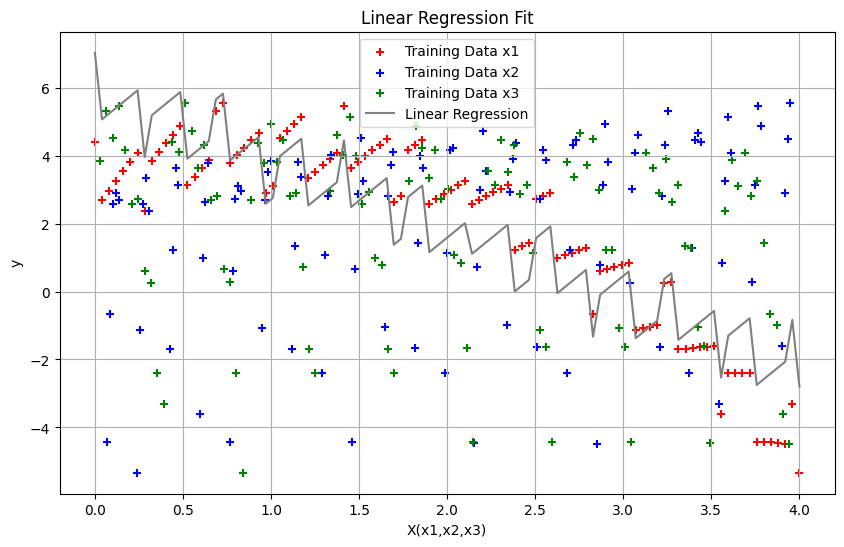

In [26]:
# Also assuming that X has 4 columns: a 3 feature columns and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data x1')
plt.scatter(X[:, 2], y, color='blue', marker='+', label='Training Data x2')
plt.scatter(X[:, 3], y, color='green', marker='+', label='Training Data x3')


# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='gray', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X(x1,x2,x3)')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


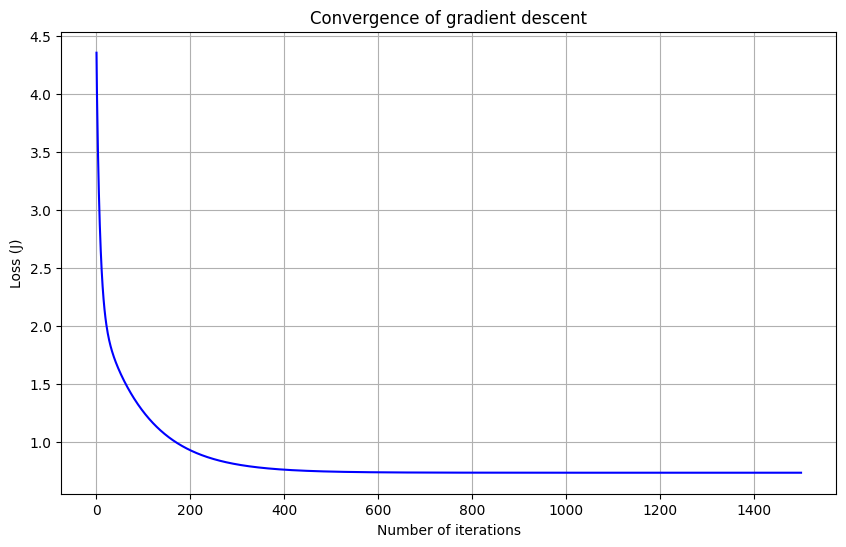

In [50]:
#plot the convergence of gradient decent
plt.plot(range(1, iterations + 1), loss_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [52]:
# predicting the value of y for new values of x1,x2,x3
# X(1,x1,x2,x3)




